**Table of contents**<a id='toc0_'></a>    
- 1. [Function definitions](#toc1_)    
- 2. [load pkl files](#toc2_)    
- 3. [concatenate df's](#toc3_)    
- 4. [Exploratory Analysis](#toc4_)    
- 5. [Histograms](#toc5_)    
  - 5.1. [ch2](#toc5_1_)    
    - 5.1.1. [$\sigma$](#toc5_1_1_)    
      - 5.1.1.1. [fitting](#toc5_1_1_1_)    
    - 5.1.2. [$\tau$](#toc5_1_2_)    
    - 5.1.3. [scale](#toc5_1_3_)    
    - 5.1.4. [Modification:  rectangular cut](#toc5_1_4_)    
      - 5.1.4.1. [$ \sigma$](#toc5_1_4_1_)    
        - 5.1.4.1.1. [fitting](#toc5_1_4_1_1_)    
      - 5.1.4.2. [$\tau$](#toc5_1_4_2_)    
        - 5.1.4.2.1. [fitting here](#toc5_1_4_2_1_)    
        - 5.1.4.2.2. [Fitting with iMinuit](#toc5_1_4_2_2_)    
      - 5.1.4.3. [scale](#toc5_1_4_3_)    
        - 5.1.4.3.1. [fitting here](#toc5_1_4_3_1_)    
    - 5.1.5. [FingerPlot](#toc5_1_5_)    
  - 5.2. [ch1](#toc5_2_)    
  - 5.3. [ch0](#toc5_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Presently, this notebook only contains wf from ch2

In [1]:
import sys
# import os
import numpy as np
import pandas as pd
import pickle
# from scipy.stats import chisquare
# from scipy.integrate import simpson

# import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
# from matplotlib.ticker import AutoMinorLocator
# from matplotlib.ticker import FormatStrFormatter

# from termcolor import colored
# from tqdm.notebook import tqdm
# from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit

In [2]:
import matplotlib.patches as patches

In [3]:
np.set_printoptions(formatter={'float': lambda x: f"{x:10.4g}"})

In [4]:
%matplotlib ipympl 

# 1. <a id='toc1_'></a>[Function definitions](#toc0_)

In [5]:
def f_gauss(x, g_mean, g_sigma, g_k):
    return g_k*(1/(g_sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-g_mean)/g_sigma)**2)

In [6]:
def red_chisq(f_obs, f_exp, fittedparameters):
    chisqr = np.sum((f_obs - f_exp)**2 / f_exp)
    ndf = f_obs.shape[0]
    return chisqr/(ndf -fittedparameters.shape[0])

# 2. <a id='toc2_'></a>[load pkl files](#toc0_)

In [7]:
# all_clean_catalogues = []
# for run_number in run_number_ls:
#     all_clean_catalogues.append(f'clean_catalogue_run000{run_number}.pkl')

In [8]:
# selected_clean_catalogue_path = os.path.join(output_folder, all_clean_catalogues[3])
# selected_clean_dict = pickle.load(open(selected_fit_catalogue_path, 'rb'))
# selected_clean_dict #['ch2']

In [9]:
output_folder = '/work/chuck/sarthak/argset/output_folder'
# output_folder = '/home/sarthak/my_projects/argset/output_folder'
# output_folder = '/work/sarthak/ArgSet/processed_data/backup_ch2/'

In [10]:
run_number_ls = [52, 53, 54, 61, 62, 63]
# run_number_ls = [52, 61]

In [11]:
all_fit_catalogues = []
for run_number in run_number_ls:
    # all_fit_catalogues.append(f'{output_folder}/fit_catalogue_run000{run_number}.pkl')
    all_fit_catalogues.append(f'{output_folder}/fit_catalogue_custom_run000{run_number}.pkl')

In [12]:
all_fit_catalogues

['/work/chuck/sarthak/argset/output_folder/fit_catalogue_custom_run00052.pkl',
 '/work/chuck/sarthak/argset/output_folder/fit_catalogue_custom_run00053.pkl',
 '/work/chuck/sarthak/argset/output_folder/fit_catalogue_custom_run00054.pkl',
 '/work/chuck/sarthak/argset/output_folder/fit_catalogue_custom_run00061.pkl',
 '/work/chuck/sarthak/argset/output_folder/fit_catalogue_custom_run00062.pkl',
 '/work/chuck/sarthak/argset/output_folder/fit_catalogue_custom_run00063.pkl']

In [13]:
fit_dict_52 = pickle.load(open( all_fit_catalogues[0], 'rb'))

In [14]:
fit_dict_53 = pickle.load(open( all_fit_catalogues[1], 'rb'))

In [15]:
fit_dict_54 = pickle.load(open( all_fit_catalogues[2], 'rb'))

In [16]:
fit_dict_61 = pickle.load(open( all_fit_catalogues[3], 'rb'))

In [17]:
fit_dict_62 = pickle.load(open( all_fit_catalogues[4], 'rb'))

In [18]:
fit_dict_63 = pickle.load(open( all_fit_catalogues[4], 'rb'))

# 3. <a id='toc3_'></a>[concatenate df's](#toc0_)

In [19]:
fit_dict_ls = [fit_dict_52, fit_dict_53, fit_dict_54, fit_dict_61, fit_dict_62, fit_dict_63]
ch_str_ls = ['ch0', 'ch1', 'ch2']
### ch_str_ls = ['ch2']

fit_catalogue = {}
for ch_x in ch_str_ls:
    fit_catalogue_x = []
    for fit_dict in fit_dict_ls:
        fit_catalogue_x.append(fit_dict[ch_x])
    fit_catalogue[ch_x] = pd.concat(fit_catalogue_x, ignore_index=True)

<p> Note: remember event_counter is unique only for a run; for concatenated DataFrames it is no longer unique identifier.</p>

# 4. <a id='toc4_'></a>[Exploratory Analysis](#toc0_)

the ratio of good fit waveforms to clean forms

In [20]:
# (fit_catalogue['ch0'][fit_catalogue['ch0']['chisqr']< 2.0]).shape[0]/(fit_catalogue['ch0']).shape[0]

In [21]:
# (fit_catalogue['ch1'][fit_catalogue['ch1']['chisqr']< 2.0]).shape[0]/(fit_catalogue['ch1']).shape[0]

In [22]:
# (fit_catalogue['ch2'][fit_catalogue[ch_x]['chisqr']< 2.0]).shape[0]/(fit_catalogue['ch2']).shape[0]

How many times fit failed to converge?

In [23]:
# fit_catalogue['ch0']['fit_param'].isnull().sum()

In [24]:
# fit_catalogue['ch1']['fit_param'].isnull().sum()

In [25]:
# fit_catalogue['ch2']['fit_param'].isnull().sum()

In [26]:
# fit_catalogue['ch0'].index.values.shape

In [27]:
# fit_catalogue['ch0'][fit_catalogue['ch0']['chisqr']< 2.0]

Drop NA rows

In [28]:
for ch_index in ch_str_ls:
    fit_catalogue[ch_index] = fit_catalogue[ch_index].dropna()

In [29]:
# sanity check: dropna works!
# fit_catalogue['ch0']['fit_param'].isnull().sum()

# 5. <a id='toc5_'></a>[Histograms](#toc0_)

extracting param values

In [30]:
param_dict = {}
for ch_index in ch_str_ls:
    t0_ls = []
    sigma_ls = []
    tau_ls = []
    scale_ls = []
    fit_param_x = {}
    for loop_index in fit_catalogue[ch_index].index.values:
        loop_fit_param = fit_catalogue[ch_index].loc[loop_index]['fit_param']
        t0_ls.append(loop_fit_param[0])
        sigma_ls.append(loop_fit_param[1])
        tau_ls.append(loop_fit_param[2])
        scale_ls.append(loop_fit_param[3])
    fit_param_x['t0'] = t0_ls
    fit_param_x['sigma'] = sigma_ls
    fit_param_x['tau'] = tau_ls
    fit_param_x['scale'] = scale_ls
    param_dict[ch_index] = fit_param_x

In [31]:
# fit_catalogue['ch0'].index.values.shape

In [32]:
# n_param = fit_catalogue['ch0']['fit_param'][0].shape[0]

## 5.1. <a id='toc5_1_'></a>[ch2](#toc0_)

Which channel?

In [33]:
selected_channel =  input("Choose channel number for processing.")
ch_x = ch_str_ls[int(selected_channel)]
# ch_str_ls = ['ch0', 'ch1', 'ch2']
# ch_x = ch_str_ls[2]

Text(0.5, 1.0, 't0')

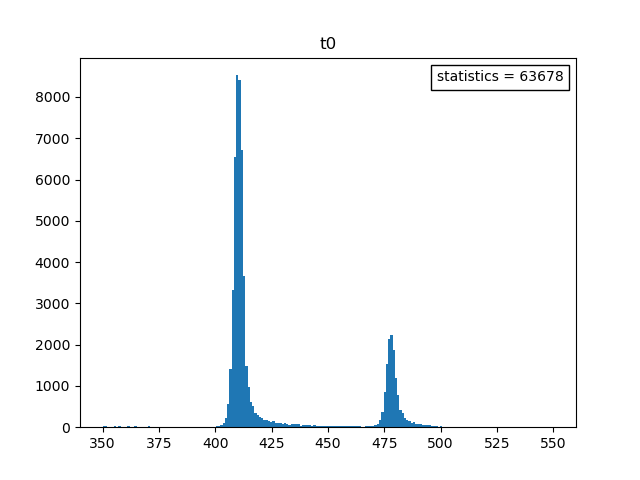

In [34]:
plt.close(1)
fig1, ax1 = plt.subplots()
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['t0'])}", \
                                       loc='upper right')
ax1.add_artist(text_in_box)
ax1.hist(param_dict[ch_x]['t0'], bins = np.linspace(350, 550, 200))
ax1.set_title('t0')

### 5.1.1. <a id='toc5_1_1_'></a>[$\sigma$](#toc0_)

/tmp/ipykernel_712900/2245914335.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig2, ax2 = plt.subplots()


Text(0.5, 1.0, '$\\sigma$')

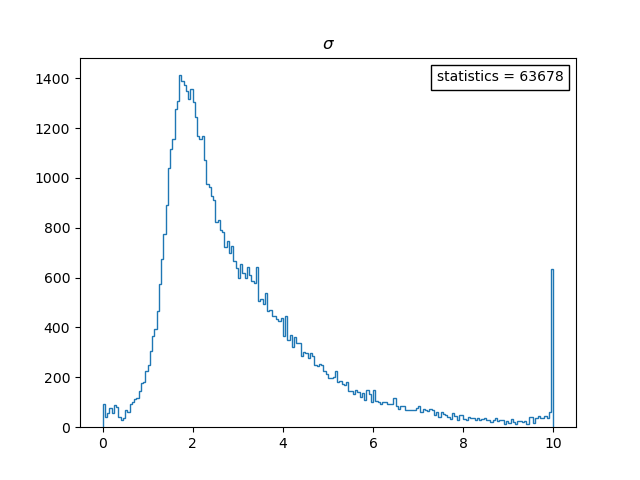

In [87]:
plt.close(2)
fig2, ax2 = plt.subplots()
hist_content, hist_edges, _hist_obj= ax2.hist(param_dict[ch_x]['sigma'], bins=200, histtype='step', label = 'data') #, bins= np.linspace(1.0, 6.0, 10))
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['sigma'])}", \
                                       loc='upper right')
ax2.add_artist(text_in_box)
ax2.set_title('$\\sigma$')

#### 5.1.1.1. <a id='toc5_1_1_1_'></a>[fitting](#toc0_)

In [88]:
x_range = range(30, 49)

# p0_input = [2, 0.45, 500.0] ## ch2
p0_input = [2, 0.45, 500.0] ## ch1
# bounds_input = ([1.0, 0.0, 500.0], [10.0, 1.0, 600.0]) ## ch2
bounds_input = ([1.0, 0.0, 0.0], [10.0, 1.0, np.inf]) ## ch1
fitted_parameters, _pcov = curve_fit(f_gauss, 
                            hist_edges[x_range], hist_content[x_range], \
                            p0 = p0_input, 
                            bounds = bounds_input,
                            sigma = np.sqrt(hist_content[x_range]),
                            absolute_sigma=True,
                            )

chisqr_value = red_chisq(hist_content[x_range], \
    f_gauss(hist_edges[x_range], *fitted_parameters), fitted_parameters
    )

chisqr_value

1.5381156420256559

In [89]:
fitted_parameters

array([     1.838,     0.6051,       2055])

In [90]:
ax2.plot(hist_edges[x_range], f_gauss(hist_edges[x_range], *fitted_parameters), 
        #  color='red', 
         label='fitted function')
ax2.legend()
chisqr_in_box = AnchoredText(f"red. chisqr = {chisqr_value:.2f}", \
                                       loc='center right')
ax2.add_artist(chisqr_in_box)

### 5.1.2. <a id='toc5_1_2_'></a>[$\tau$](#toc0_)

Text(0.5, 1.0, '$\\tau$')

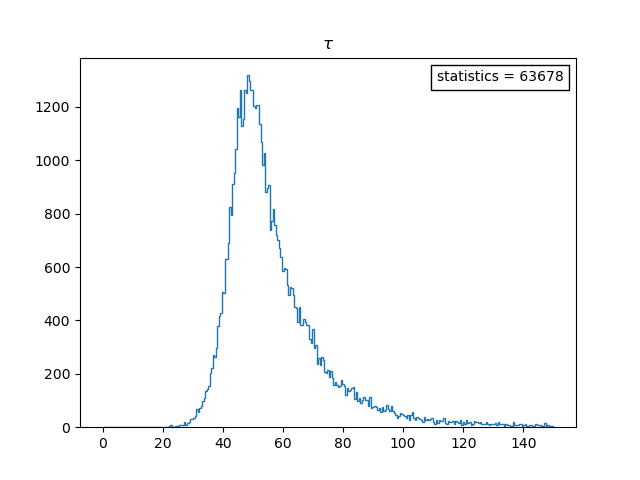

In [39]:
plt.close(3)
fig3, ax3 = plt.subplots()
ax3.hist = plt.hist(param_dict[ch_x]['tau'], bins= np.linspace(0.0, 150.0, 300), histtype='step')
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['tau'])}", \
                                       loc='upper right')
ax3.add_artist(text_in_box)
ax3.set_title('$\\tau$')

### 5.1.3. <a id='toc5_1_3_'></a>[scale](#toc0_)

Text(0.5, 1.0, 'scale')

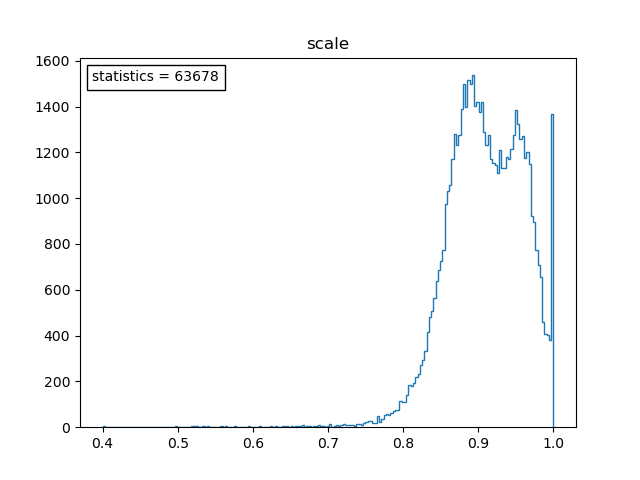

In [40]:
plt.close(4)
fig4, ax4 = plt.subplots()
ax4.hist(param_dict[ch_x]['scale'], bins= np.linspace(0.4, 1.0, 200), histtype='step')
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['scale'])}", \
                                       loc='upper left')
ax4.add_artist(text_in_box)
ax4.set_title('scale')

/tmp/ipykernel_712900/3524368693.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig5, ax5 = plt.subplots()


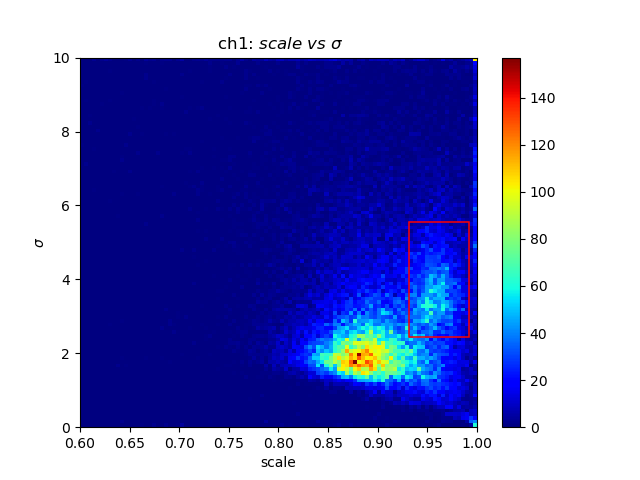

In [91]:
plt.close(5)

# ch_x = 'ch2'
red_win = patches.Rectangle((0.932, 2.44), 0.06, 3.10, linewidth=1.1, edgecolor='r', facecolor='none')
fig5, ax5 = plt.subplots()
hist_h, hist_xedges, hist_yedges, hist_im = ax5.hist2d(param_dict[ch_x]['scale'], \
                    param_dict[ch_x]['sigma'], bins = [np.linspace(0.6, 1.0, 100), np.linspace(0., 10., 100)], \
                    cmap='jet')
ax5.add_patch(red_win)
ax5.set_xlabel('scale')
ax5.set_ylabel('$\sigma$')
fig5.colorbar(hist_im)
ax5.set_title(f' {ch_x}: $scale\ vs \ \\sigma$');

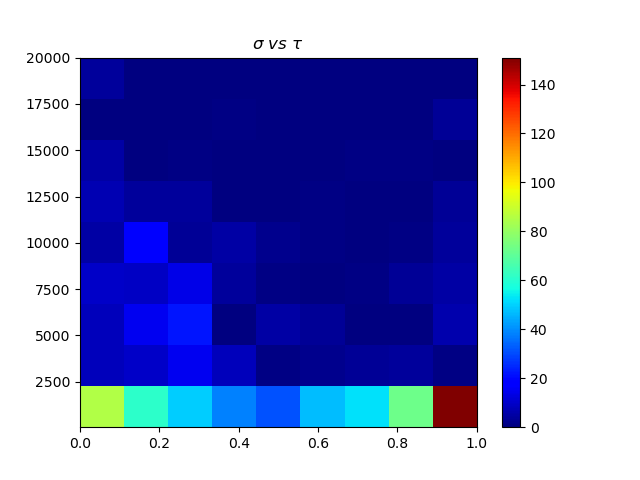

In [42]:
plt.close(6)
fig6, ax6 = plt.subplots()
hist_h, hist_xedges, hist_yedges, hist_im = ax6.hist2d(param_dict[ch_x]['sigma'], \
                    param_dict[ch_x]['tau'], bins = [np.linspace(0.0, 1.0, 10), np.linspace(50e0, 20e3, 10)] , \
                        cmap='jet')
fig6.colorbar(hist_im)
ax6.set_title('$\\sigma \ vs \ \\tau $');

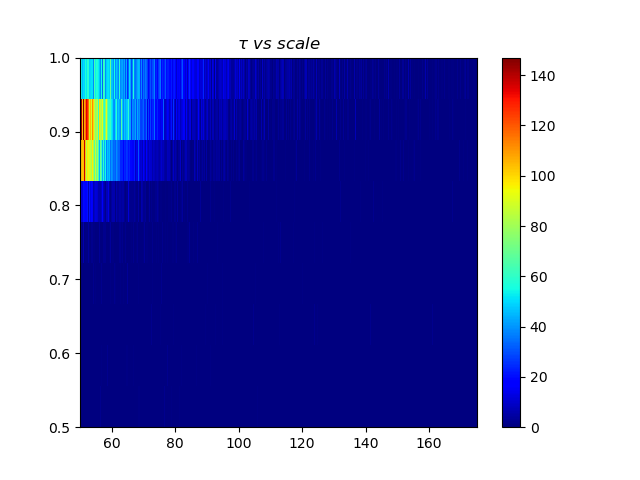

In [43]:
plt.close(7)
fig7, ax7 = plt.subplots()
hist_h, hist_xedges, hist_yedges, hist_im = ax7.hist2d(param_dict[ch_x]['tau'], \
                    param_dict[ch_x]['scale'], bins = [np.linspace(50, 175, 1000), np.linspace(0.5, 1.0, 10)], \
                    cmap='jet')
fig7.colorbar(hist_im)
ax7.set_title('$\\tau \ vs \ scale $');

### 5.1.4. <a id='toc5_1_4_'></a>[Modification:  rectangular cut](#toc0_)

<span style='color:lightblue'> List of removed events </span>

In [44]:
### list of events which contribute to red window for Ch2
internal_points = []
for fit_index in fit_catalogue[ch_x].index.values:#TODO: change to ch_x
    loop_fit_param = fit_catalogue[ch_x]['fit_param'].loc[fit_index]
    param_point = (loop_fit_param[3], loop_fit_param[1]) # scale, sigma
    transformed_interior_point = red_win.get_data_transform().transform(param_point)
    if red_win.contains_point(transformed_interior_point, radius=0):
        internal_points.append(fit_index)

<span style='color:lightblue'> applying cut </span>

In [45]:
fit_catalogue[ch_x] = fit_catalogue[ch_x].drop(index = internal_points)

<span style='color:lightblue'> extracting param_dict out of DataFrames for all channels </span>

In [46]:
param_dict_cut = {}
for ch_index in ch_str_ls:
# for ch_x in ['ch2']: #ch_str_ls:
    t0_ls = []
    sigma_ls = []
    tau_ls = []
    scale_ls = []
    fit_param_x = {}
    for loop_index in fit_catalogue[ch_index].index.values:
        loop_fit_param = fit_catalogue[ch_index].loc[loop_index]['fit_param']
        t0_ls.append(loop_fit_param[0])
        sigma_ls.append(loop_fit_param[1])
        tau_ls.append(loop_fit_param[2])
        scale_ls.append(loop_fit_param[3])
    fit_param_x['t0'] = t0_ls
    fit_param_x['sigma'] = sigma_ls
    fit_param_x['tau'] = tau_ls
    fit_param_x['scale'] = scale_ls
    param_dict_cut[ch_index] = fit_param_x

In [47]:
# selected_channel = input("enter channel number")
ch_x = ch_str_ls[int(selected_channel)]
# ch_x = 'ch2'

Text(0.5, 1.0, 'ch1 t0: patch removed')

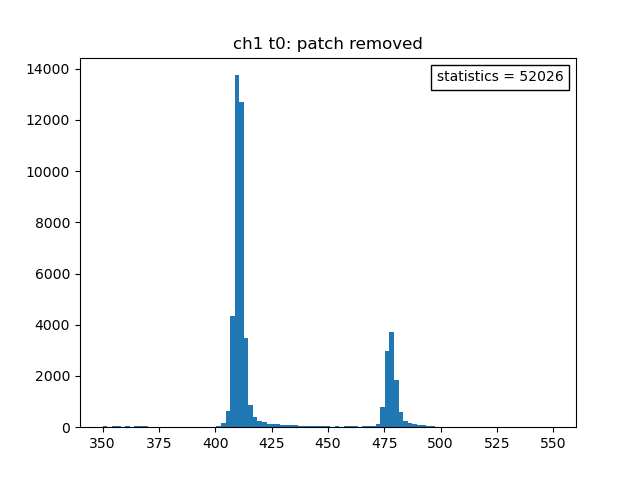

In [48]:
plt.close(22)
fig22, ax22 = plt.subplots()
text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['t0'])}", \
                                       loc='upper right')
ax22.add_artist(text_in_box)
ax22.hist(param_dict_cut[ch_x]['t0'], bins = np.linspace(350, 550, 100))
ax22.set_title(f"{ch_x} t0: patch removed")

#### 5.1.4.1. <a id='toc5_1_4_1_'></a>[$ \sigma$](#toc0_)

/tmp/ipykernel_712900/995824596.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig23, ax23 = plt.subplots()


<ErrorbarContainer object of 3 artists>

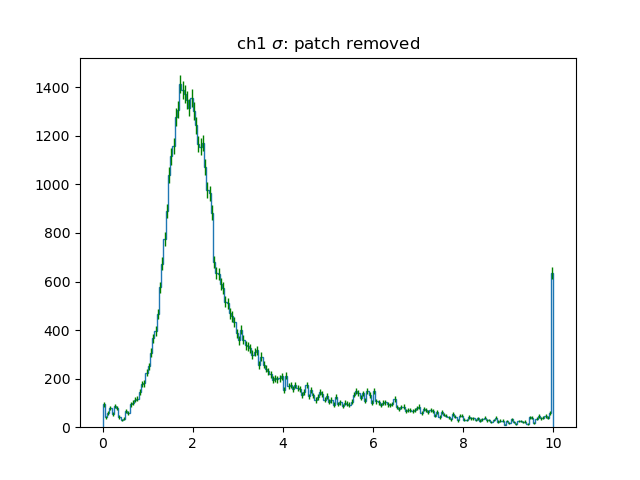

In [113]:
# ch_x = 'ch2'
plt.close(23)
fig23, ax23 = plt.subplots()
hist_content, hist_edges, _hist_obj= ax23.hist(param_dict_cut[ch_x]['sigma'], bins=200, histtype='step', label='sigma') #, bins= np.linspace(1.0, 6.0, 10))
# text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['sigma'])}", \
                                    #    loc='lower right')
# ax23.add_artist(text_in_box)
ax23.set_title(f"{ch_x} $\\sigma$: patch removed")
## error bars
hist_centers = []
for i in range(hist_edges.shape[0]):
    center_variable = np.mean(hist_edges[i:i+2])
    hist_centers.append(center_variable)

hist_centers = np.array(hist_centers)

ax23.errorbar(hist_centers[:hist_content.shape[0]], hist_content, \
              yerr = np.sqrt(hist_content), elinewidth=1.0, linestyle='none', ecolor='green')

##### 5.1.4.1.1. <a id='toc5_1_4_1_1_'></a>[fitting](#toc0_)

In [50]:
x_range

range(30, 49)

In [94]:
p0_input = [2, 0.45, 500.0]
bounds_input = ([1.50, 0.0, 0.0], [2.15, 1.0, np.inf])

fitted_parameters_sigma, _pcov = curve_fit(f_gauss, 
                            hist_edges[x_range], hist_content[x_range], \
                            p0 = p0_input, 
                            sigma = np.sqrt(hist_content[x_range]),
                            absolute_sigma=True,
                            bounds = bounds_input,
                            )

In [95]:
fitted_parameters_sigma

array([     1.838,     0.5918,       2016])

In [96]:
ax23.plot(hist_edges[x_range], f_gauss(hist_edges[x_range], *fitted_parameters_sigma), \
          color='red', label='fitted function')
ax23.legend()

In [97]:
chisqr_value = red_chisq(hist_content[x_range], \
    f_gauss(hist_edges[x_range], *fitted_parameters_sigma), fitted_parameters_sigma
    )

In [114]:
text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['sigma'])} \nred. chisqr = {chisqr_value:.2f}", \
                                       loc='upper right')
ax23.add_artist(text_in_box)

#### 5.1.4.2. <a id='toc5_1_4_2_'></a>[$\tau$](#toc0_)

<ErrorbarContainer object of 3 artists>

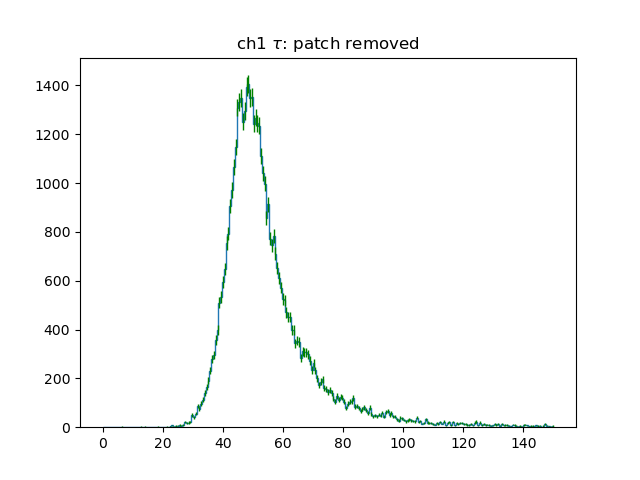

In [134]:
# ch_x = 'ch2'
plt.close(24)
fig24, ax24 = plt.subplots()
hist_content, hist_edges, _hist_obj = ax24.hist(param_dict_cut[ch_x]['tau'], bins= np.linspace(0.0, 150.0, 250), histtype='step')
# text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['tau'])}", \
#                                        loc='upper right')
# ax24.add_artist(text_in_box)
ax24.set_title(f"{ch_x} $\\tau$: patch removed")

##error bars
hist_centers = []
for i in range(hist_edges.shape[0]):
    center_variable = np.mean(hist_edges[i:i+2])
    hist_centers.append(center_variable)

hist_centers = np.array(hist_centers)

ax24.errorbar(hist_centers[:hist_content.shape[0]], hist_content, yerr = np.sqrt(hist_content), elinewidth=1.0, linestyle='none', ecolor='green')

##### 5.1.4.2.1. <a id='toc5_1_4_2_1_'></a>[fitting here](#toc0_)

In [135]:
# x_range = range(58, 91) # ch2
x_range = range(58, 91) # ch1

In [136]:
p0_input = [50.0, 9.0, 8000.0]
# bounds_input = ([20.0, 0.05, 1.0], [60.0, 15.5, 10_000]) ## ch2
bounds_input = ([20.0, 0.05, 1.0], [60.0, 15.5, np.inf]) ## ch1

fitted_parameters_tau, _pcov = curve_fit(f_gauss, \
                            hist_edges[x_range], hist_content[x_range], \
                            p0 = p0_input, \
                            bounds = bounds_input, \
                            sigma = np.sqrt(hist_content[x_range]), \
                            absolute_sigma=True, \
                            # x_scale = [10, 1, 1000], \
                            method = 'trf', \
                            ## method = 'dogbox', \
                            )

### plotting
ax24.plot(hist_edges[x_range], f_gauss(hist_edges[x_range], *fitted_parameters_tau), color='red', label='fitted function')
ax24.legend(loc='upper right')

chisqr_value = red_chisq(hist_content[x_range], \
    f_gauss(hist_edges[x_range], *fitted_parameters_tau), fitted_parameters_tau
    )

text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['tau'])} \nred. chisqr = {chisqr_value:.2f}", \
                                       loc='center right')

ax24.add_artist(text_in_box)

In [120]:
fitted_parameters_tau

array([        60,      10.03,  7.052e+04])

##### 5.1.4.2.2. <a id='toc5_1_4_2_2_'></a>[Fitting with iMinuit](#toc0_)

In [60]:
# import iminuit
# from iminuit.cost import LeastSquares
# from iminuit import Minuit

In [61]:
# least_squares = LeastSquares(x_values[58:91], hist_content[58:91], np.sqrt(hist_content[58:91]), f_gauss)
# # least_squares = LeastSquares(x_values, hist_content[:x_values.shape[0]], np.ones(x_values.shape[0]), f_gauss)

In [62]:
# m_obj = Minuit(least_squares, g_mean = 50.0, g_sigma = 9.5, g_k = 8000)

In [63]:
# m_obj.simplex()

In [64]:
# m_obj.migrad()

#### 5.1.4.3. <a id='toc5_1_4_3_'></a>[scale](#toc0_)

Text(0.5, 1.0, 'ch1 scale: patch removed')

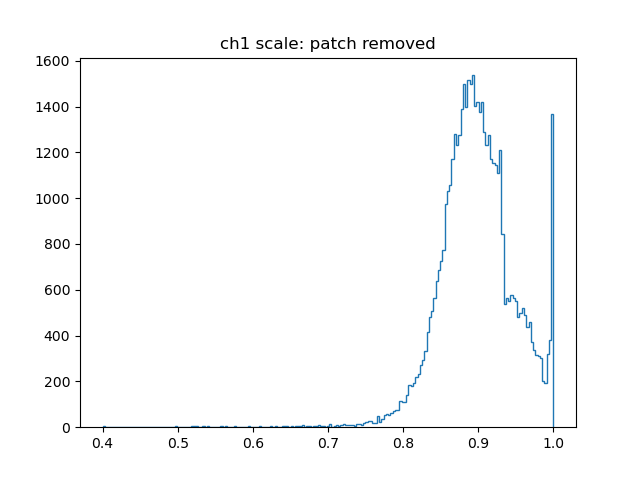

In [161]:
# ch_x = 'ch2'
plt.close(25)
fig25, ax25 = plt.subplots()
hist_content, hist_edges, _hist_obj = ax25.hist(param_dict_cut[ch_x]['scale'], \
                                                bins= np.linspace(0.4, 1.0, 200), histtype='step', label='data')
# text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['scale'])}", \
#                                        loc='upper left')
# ax25.add_artist(text_in_box)
ax25.set_title(f"{ch_x} scale: patch removed")

##### 5.1.4.3.1. <a id='toc5_1_4_3_1_'></a>[fitting here](#toc0_)

In [162]:
# x_range = range(130, 172) #range(130, 177) 160 165 # ch2
x_range = range(140, 172) # ch1

In [163]:
p0_input = [0.89, 0.09, 200.0]
bounds_input = ([0.8, 0.01, 1.0], [1.0, 1.0, 10_000])

fitted_parameters_scale, _pcov = curve_fit(f_gauss, \
                            hist_edges[x_range], hist_content[x_range], \
                            p0 = p0_input, \
                            bounds = bounds_input, \
                            sigma = np.sqrt(hist_content[x_range]), \
                            absolute_sigma=True, \
                            # x_scale = [10, 1, 1000], \
                            method = 'trf', \
                            ## method = 'dogbox', \
                            )
##error bars
hist_centers = []
for i in range(hist_edges.shape[0]):
    center_variable = np.mean(hist_edges[i:i+2])
    hist_centers.append(center_variable)

hist_centers = np.array(hist_centers)

ax25.errorbar(hist_centers[:hist_content.shape[0]], hist_content, \
              yerr = np.sqrt(hist_content), elinewidth=1.0, linestyle='none', ecolor='green')
### plotting
ax25.plot(hist_edges[x_range], f_gauss(hist_edges[x_range], *fitted_parameters_scale), \
          color='red', label='fitted function')
ax25.legend(loc='lower left')

chisqr_value = red_chisq(hist_content[x_range], \
    f_gauss(hist_edges[x_range], *fitted_parameters_scale), fitted_parameters_scale
    )

print(f'chisqr_value: {chisqr_value}')
print(f'fitted_parameters_scale: {fitted_parameters_scale}')

text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['scale'])} \nred. chisqr = {chisqr_value:.2f}", \
                                       loc='center left')

ax25.add_artist(text_in_box)

chisqr_value: 1.7930754558725004
fitted_parameters_scale: [    0.8902    0.03633      134.3]


2d parameter space 

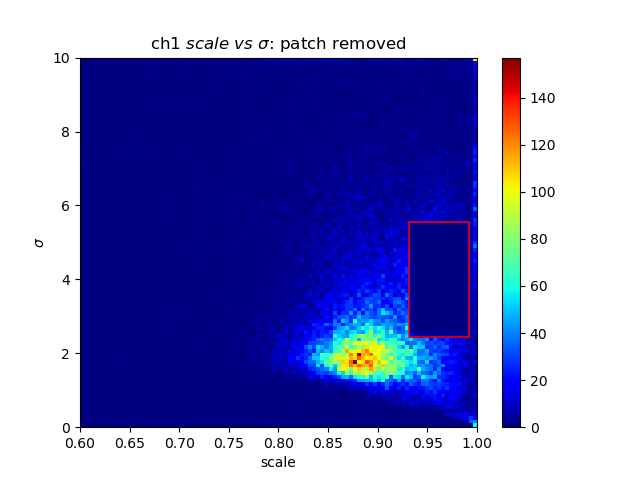

In [67]:
# ch_x = 'ch2'
plt.close(26)
fig26, ax26 = plt.subplots()
red_win = patches.Rectangle((0.932, 2.44), 0.06, 3.10, linewidth=1.1, edgecolor='r', facecolor='none')

hist_h, hist_xedges, hist_yedges, hist_im = ax26.hist2d(param_dict_cut[ch_x]['scale'], param_dict_cut[ch_x]['sigma'], \
           bins = [np.linspace(0.6, 1.0, 100), np.linspace(0., 10., 100)], cmap='jet')
ax26.add_patch(red_win)
ax26.set_xlabel('scale')
ax26.set_ylabel('$\sigma$')
fig26.colorbar(hist_im)
ax26.set_title(f"{ch_x} $scale\ vs \ \\sigma$: patch removed");

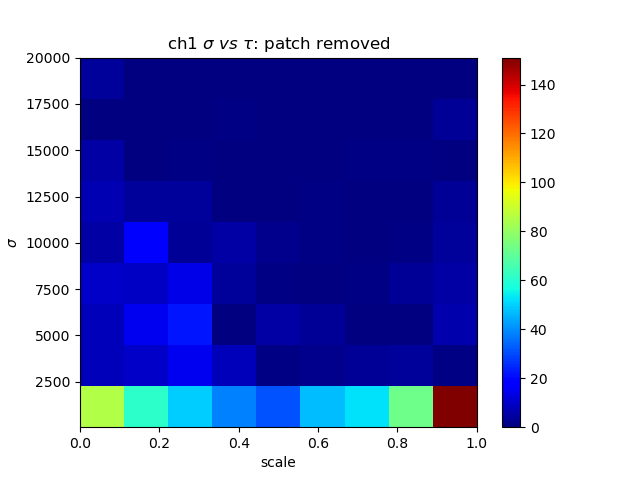

In [68]:
# ch_x = 'ch2'
plt.close(27)
fig27, ax27 = plt.subplots()
hist_h, hist_xedges, hist_yedges, hist_im = ax27.hist2d(param_dict_cut[ch_x]['sigma'], param_dict_cut[ch_x]['tau'], \
           bins = [np.linspace(0.0, 1.0, 10), np.linspace(50e0, 20e3, 10)] , cmap='jet')
ax27.set_xlabel('scale')
ax27.set_ylabel('$\sigma$')
fig27.colorbar(hist_im)
ax27.set_title(f"{ch_x} $\\sigma \ vs \ \\tau $: patch removed");

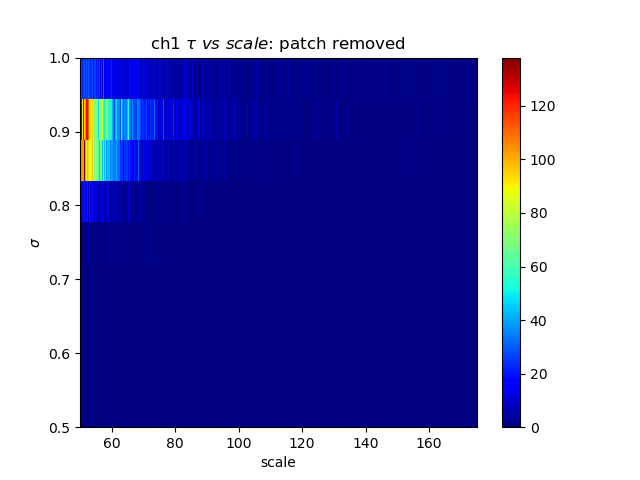

In [69]:
# ch_x = 'ch2'
plt.close(28)
fig28, ax28 = plt.subplots()
hist_h, hist_xedges, hist_yedges, hist_im = ax28.hist2d(param_dict_cut[ch_x]['tau'], \
            param_dict_cut[ch_x]['scale'], bins = [np.linspace(50, 175, 1000), np.linspace(0.5, 1.0, 10)] ,\
            cmap='jet')

ax28.set_xlabel('scale')
ax28.set_ylabel('$\sigma$')
fig28.colorbar(hist_im)
ax28.set_title(f"{ch_x} $\\tau \ vs \ scale $: patch removed");

### 5.1.5. <a id='toc5_1_5_'></a>[FingerPlot](#toc0_)

In [70]:
fit_catalogue[ch_x]

,event_counter,wf_ch1,wf_raw,fit_param,chisqr
0,13.0,"[15.0, 20.0, 17.0, 13.0, 29.0, 12.0, 20.0, 6.0...","[-3.0, 2.0, -1.0, -5.0, 11.0, -6.0, 2.0, -12.0...","[476.4450807483847, 2.325077964385896, 69.0761...",1.346508
2,72.0,"[20.0, 13.0, 23.0, 21.0, 18.0, 24.0, 21.0, 7.0...","[1.0, -6.0, 4.0, 2.0, -1.0, 5.0, 2.0, -12.0, 6...","[345.8065531727645, 2.435318061245033, 65.1416...",1.490143
3,192.0,"[16.0, 12.0, 16.0, 11.0, 17.0, 7.0, 20.0, 14.0...","[-1.0, -5.0, -1.0, -6.0, 0.0, -10.0, 3.0, -3.0...","[479.00001248745605, 4.179272874126565, 88.271...",1.549790
4,336.0,"[26.0, 20.0, 25.0, 16.0, 18.0, 15.0, 17.0, 20....","[8.0, 2.0, 7.0, -2.0, 0.0, -3.0, -1.0, 2.0, -4...","[478.000001434128, 2.6357756320319186, 60.3778...",1.400335
6,395.0,"[21.0, 18.0, 10.0, 10.0, 23.0, 7.0, 18.0, 22.0...","[4.0, 1.0, -7.0, -7.0, 6.0, -10.0, 1.0, 5.0, 1...","[477.00000931608685, 1.8450647201340398, 46.54...",1.522211
...,...,...,...,...,...
63684,99971.0,"[19.0, 30.0, 21.0, 14.0, 16.0, 19.0, 15.0, 22....","[1.0, 12.0, 3.0, -4.0, -2.0, 1.0, -3.0, 4.0, -...","[409.00000244287196, 1.4645508701049128, 70.26...",1.451243
63685,99977.0,"[11.0, 17.0, 21.0, 7.0, 24.0, 16.0, 22.0, 14.0...","[-4.0, 2.0, 6.0, -8.0, 9.0, 1.0, 7.0, -1.0, 4....","[405.0000043362512, 4.102630695849221, 66.5697...",1.520443
63686,99988.0,"[24.0, 21.0, 11.0, 19.0, 12.0, 28.0, 23.0, 25....","[5.0, 2.0, -8.0, 0.0, -7.0, 9.0, 4.0, 6.0, -1....","[407.8368242179733, 1.9898736442693647, 69.123...",1.297392
63687,99993.0,"[22.0, 24.0, 11.0, 25.0, 21.0, 9.0, 15.0, 9.0,...","[6.0, 8.0, -5.0, 9.0, 5.0, -7.0, -1.0, -7.0, 0...","[410.0530388392954, 1.6098138783439668, 67.930...",1.514275


In [71]:
(fit_catalogue[ch_x]['chisqr']<2).sum()

49858

In [72]:
# pulse_integration_window_begin = 450
# pulse_integration_window_end = 650

integration_vector = np.array([])

for wf_index in fit_catalogue[ch_x]['wf_raw'].index.values:
    if fit_catalogue[ch_x]['chisqr'].loc[wf_index] < 2.0:
    # if True:
        fitted_param = fit_catalogue[ch_x]['fit_param'][wf_index]
        fitted_baseline = fitted_param[4]
        trace = fit_catalogue[ch_x]['wf_raw'].loc[wf_index] - fitted_baseline
        peak_loc =  int(fitted_param[0])
        # pulse_win_integration_value = np.sum(trace[pulse_integration_window_begin:pulse_integration_window_end]) # fixed window
        pulse_win_integration_value = np.sum(trace[peak_loc-10:peak_loc+50]) # asymmetric window around peak
        integration_vector = np.append(integration_vector, pulse_win_integration_value)

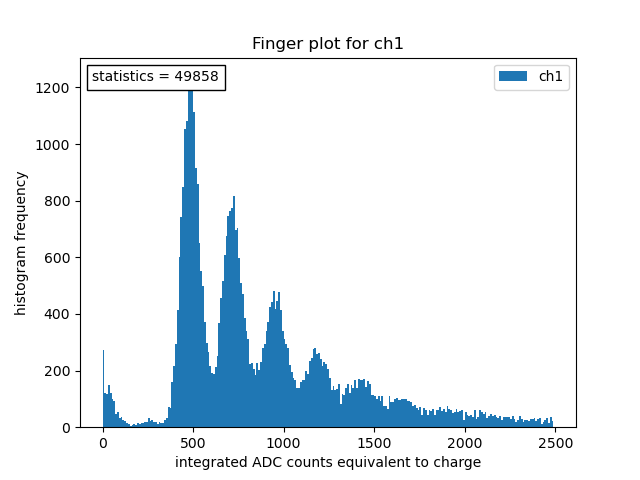

In [80]:
fig99, ax99 = plt.subplots()
# ax99.hist(integration_vector, bins=np.arange(0, 6000, 10), color='C0', label='ch2'); # fixed window
ax99.hist(integration_vector, bins=np.arange(0, 2500, 10), color='C0', label=ch_x); # peak_loc
# ax99.hist(integration_vector, bins=2000, color='C0', label='ch2');
ax99.legend()
ax99.set_title(f'Finger plot for {ch_x}')
ax99.set_xlabel('integrated ADC counts equivalent to charge')
ax99.set_ylabel('histogram frequency')
text_in_box = AnchoredText(f"statistics = {len(integration_vector)}", \
                                       loc='upper left')
ax99.add_artist(text_in_box)

In [ ]:
sys.exit()

SystemExit: 

/home/sarthak/miniconda3/envs/jar/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Fingerplot from pulse model

In [74]:
def pulse_template(t, t0, sigma, tau, scale, baseline, K) -> np.ndarray:
    ''' 
    ARMA template.
    t0 - offset
    K - scalar multiplication factor for matching data
    '''
    return baseline + K*((1-scale)/(sigma*np.sqrt(2*np.pi))*np.exp(-((t-t0)/(sigma))**2/2) + scale*np.heaviside(t-t0,0)/tau*np.exp(-(t-t0)/tau))

In [77]:
x_values = np.arange(fit_catalogue[ch_x]['wf_raw'][0].shape[0])

In [81]:
fit_catalogue[ch_x]['wf_raw'].index.values

array([    0,     2,     3, ..., 63686, 63687, 63688])

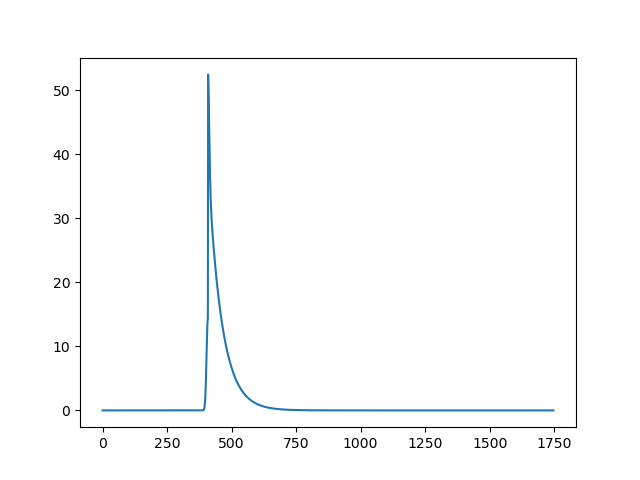

In [82]:
wf_index = 63688
fig111, ax111 = plt.subplots()
fitted_param = fit_catalogue[ch_x]['fit_param'][wf_index]
ax111.plot(pulse_template(x_values, *fitted_param) - fitted_param[4])

In [83]:
from scipy.integrate import simpson

In [84]:
integration_vector = np.array([])
for wf_index in fit_catalogue[ch_x]['wf_raw'].index.values:
    if fit_catalogue[ch_x]['chisqr'].loc[wf_index] < 2:#TODO: change to ch_x
        fitted_param = fit_catalogue[ch_x]['fit_param'][wf_index]
        trace = pulse_template(x_values, *fitted_param) - fitted_param[4]
        # pulse_win_integration_value = np.sum(trace)
        pulse_win_integration_value = simpson(trace)
        integration_vector = np.append(integration_vector, pulse_win_integration_value)

/tmp/ipykernel_712900/720568558.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig111, ax111 = plt.subplots()


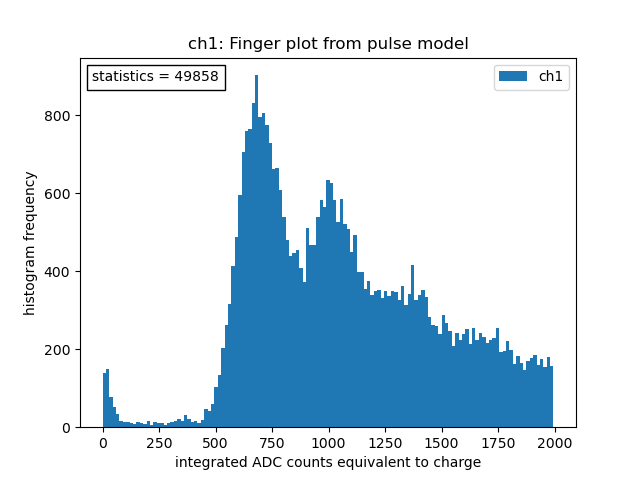

In [85]:
fig111, ax111 = plt.subplots()
# ax111.hist(integration_vector, bins=np.arange(450, 6000, 60), color='C0', label='ch2'); # fixed window
ax111.hist(integration_vector, bins=np.arange(0, 2000, 15), color='C0', label=f'{ch_x}'); # peak_loc
# ax111.hist(integration_vector, bins=2000, color='C0', label='ch2');
ax111.legend()
ax111.set_title(f'{ch_x}: Finger plot from pulse model')
ax111.set_xlabel('integrated ADC counts equivalent to charge')
ax111.set_ylabel('histogram frequency')
text_in_box = AnchoredText(f"statistics = {len(integration_vector)}", \
                                       loc='upper left')
ax111.add_artist(text_in_box)

<hr> </hr>